# Projekt Danica - detekcija zaraženih stanica
## Eksploratorna bilježnica

Primjer slike s kojom ćemo se baviti (među 80-ak sličnih):

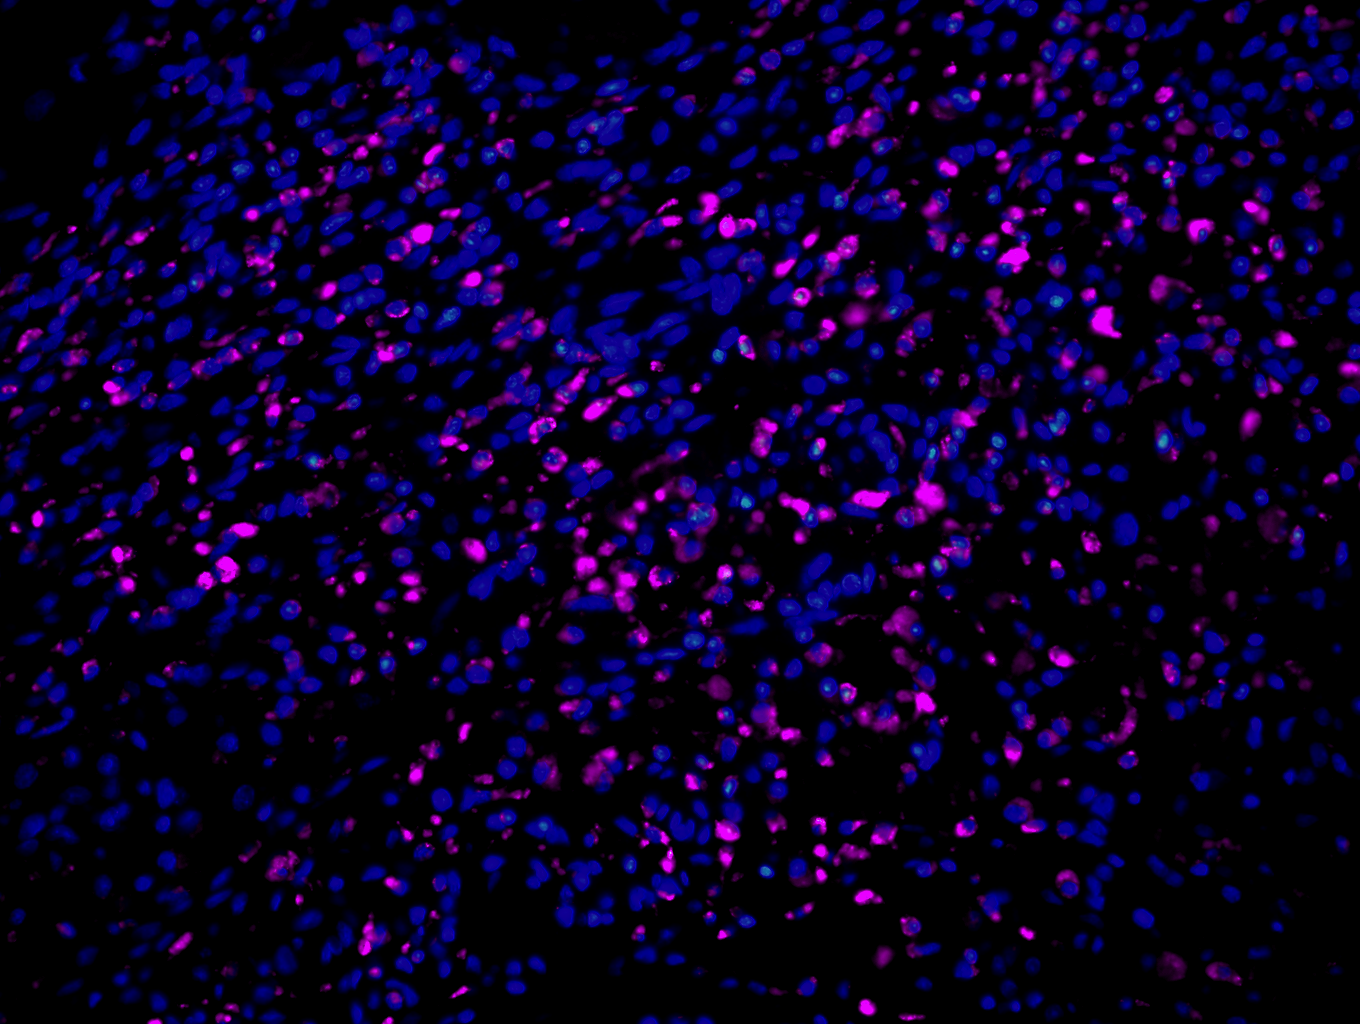

In [1]:
from PIL import Image

Danica = Image.open("../images/training_images/ED4.13 1.3 merge track.tif")
Danica

Inače, kada ovu sliku otvorimo s ImageJ programom, dobijemo i oznaku položaja svih zaraženih stanica, kako su anotirane ručnim postupkom.


Započnimo prvo s par filtera.

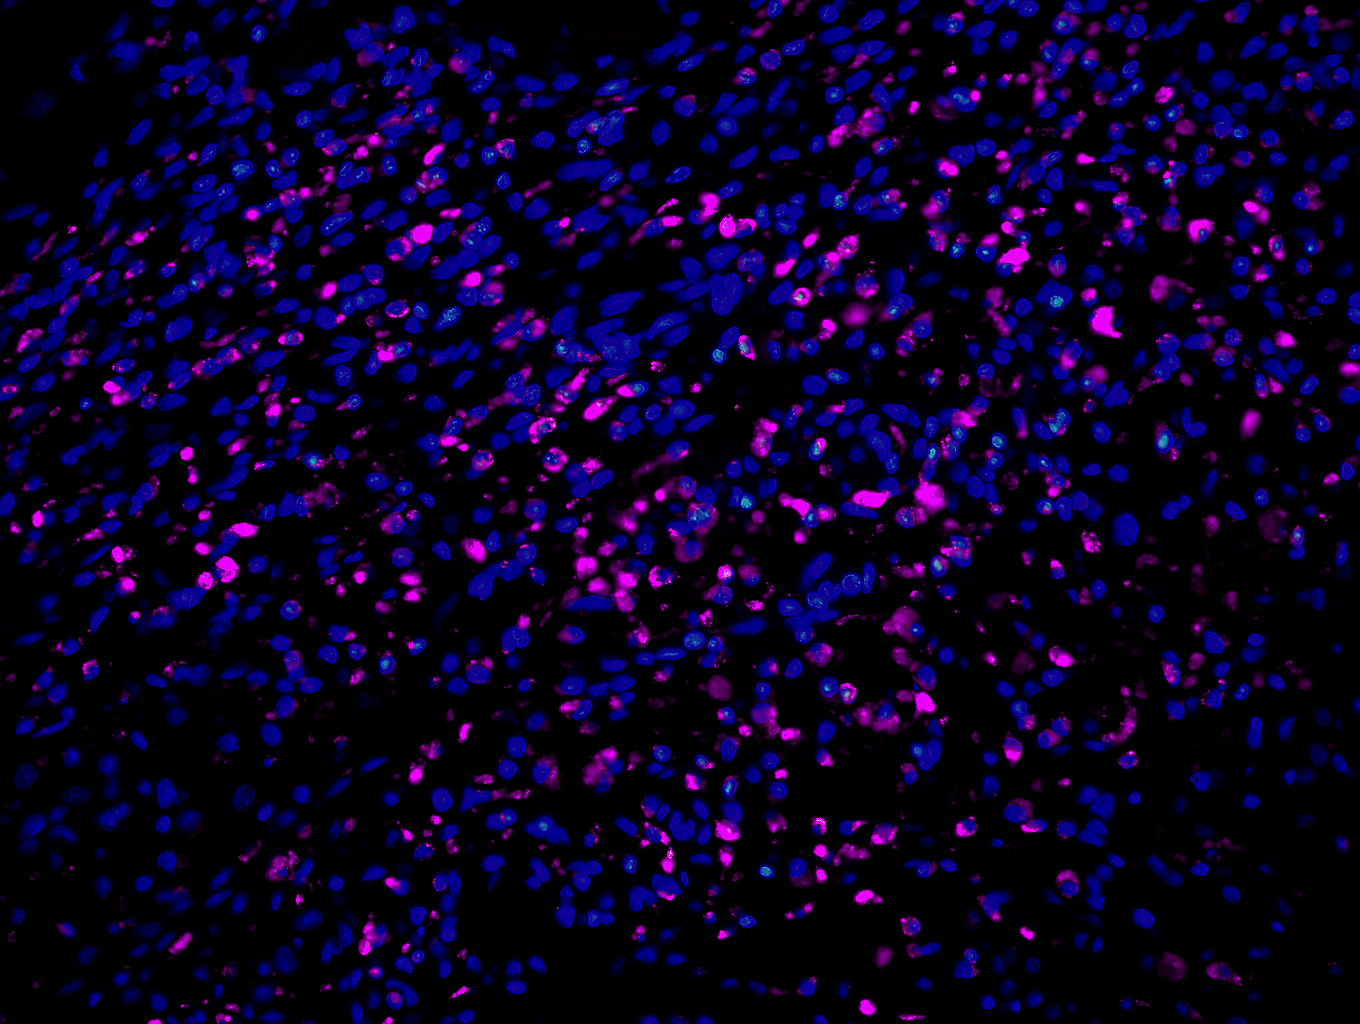

In [26]:
from PIL import ImageFilter
x = Danica.filter(ImageFilter.DETAIL)
x = x.filter(ImageFilter.SHARPEN)
x

Ovo već izgleda bolje.

Problem je što stvarno trebamo samo rub plavih stanica, a roze mrlje želimo ostaviti kakve jesu. Stoga ćemo prvo podijeliti sliku po kanalima, analizirati dijelove zasebno i poslije ih spojiti.

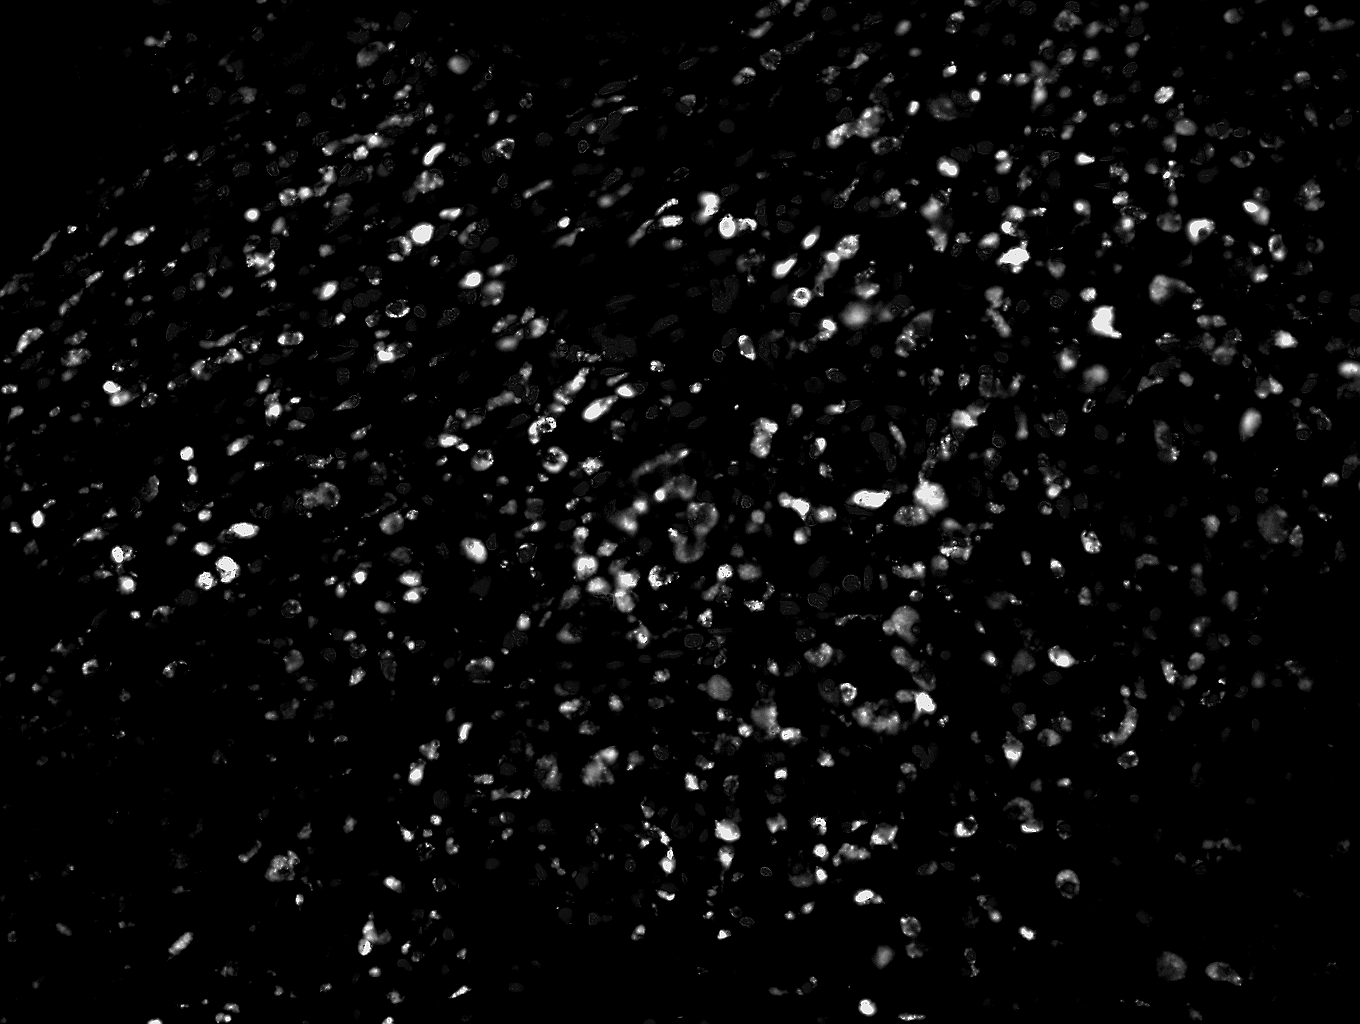

In [27]:
import numpy as np
data = np.asarray(x)

arr = data.copy()
arr[..., 2] = 0
arr[..., 1] = 0
img = Image.fromarray(arr[..., 0])
img



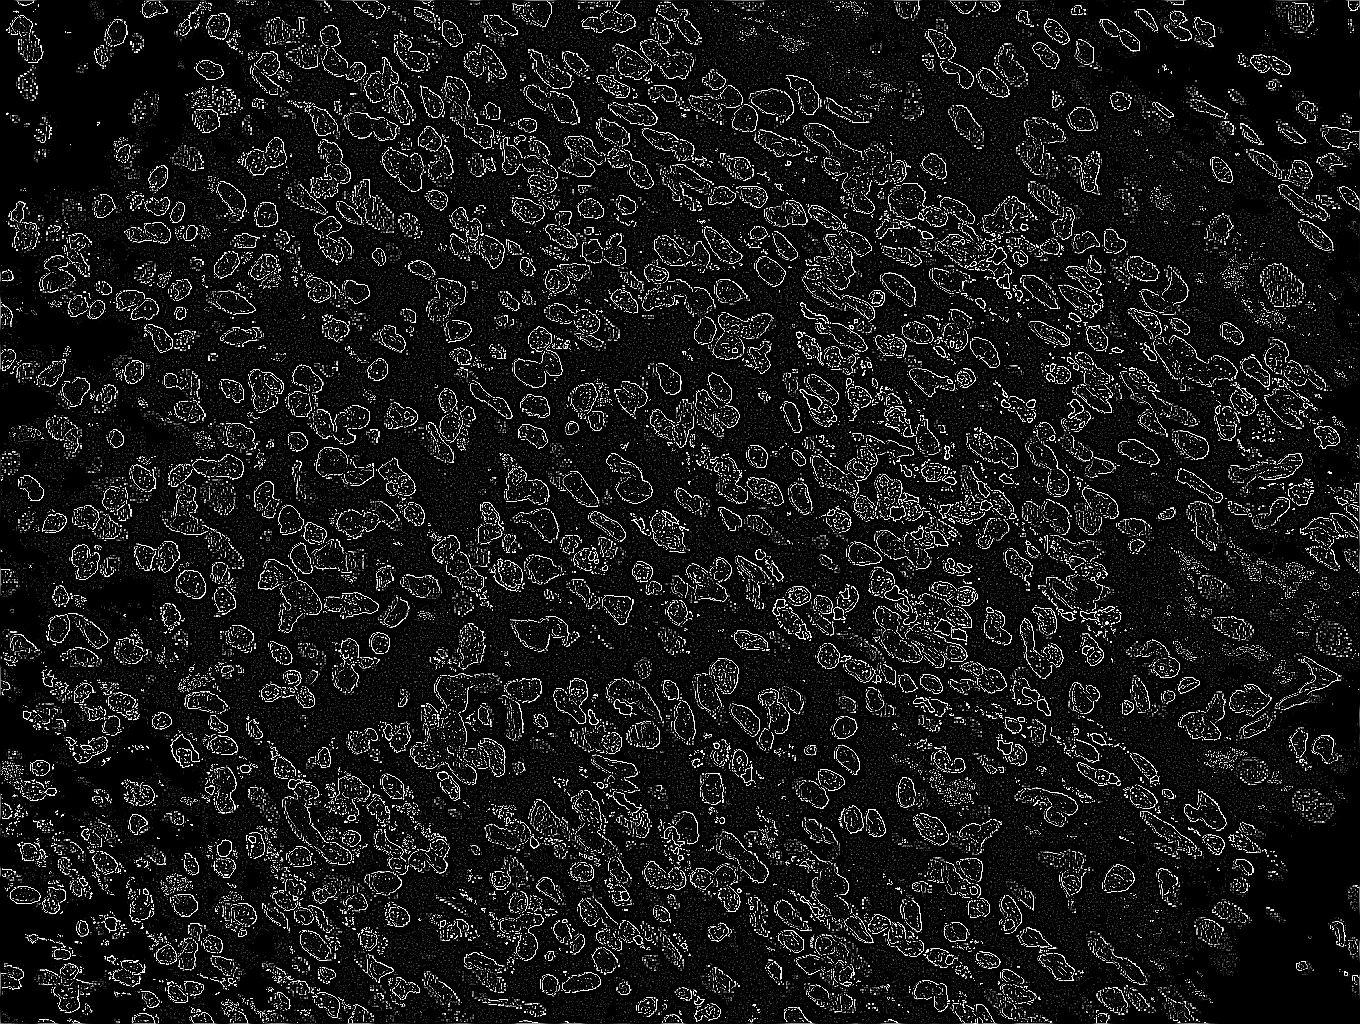

In [39]:
blue_edged = blue.filter(ImageFilter.FIND_EDGES)
blue_edged

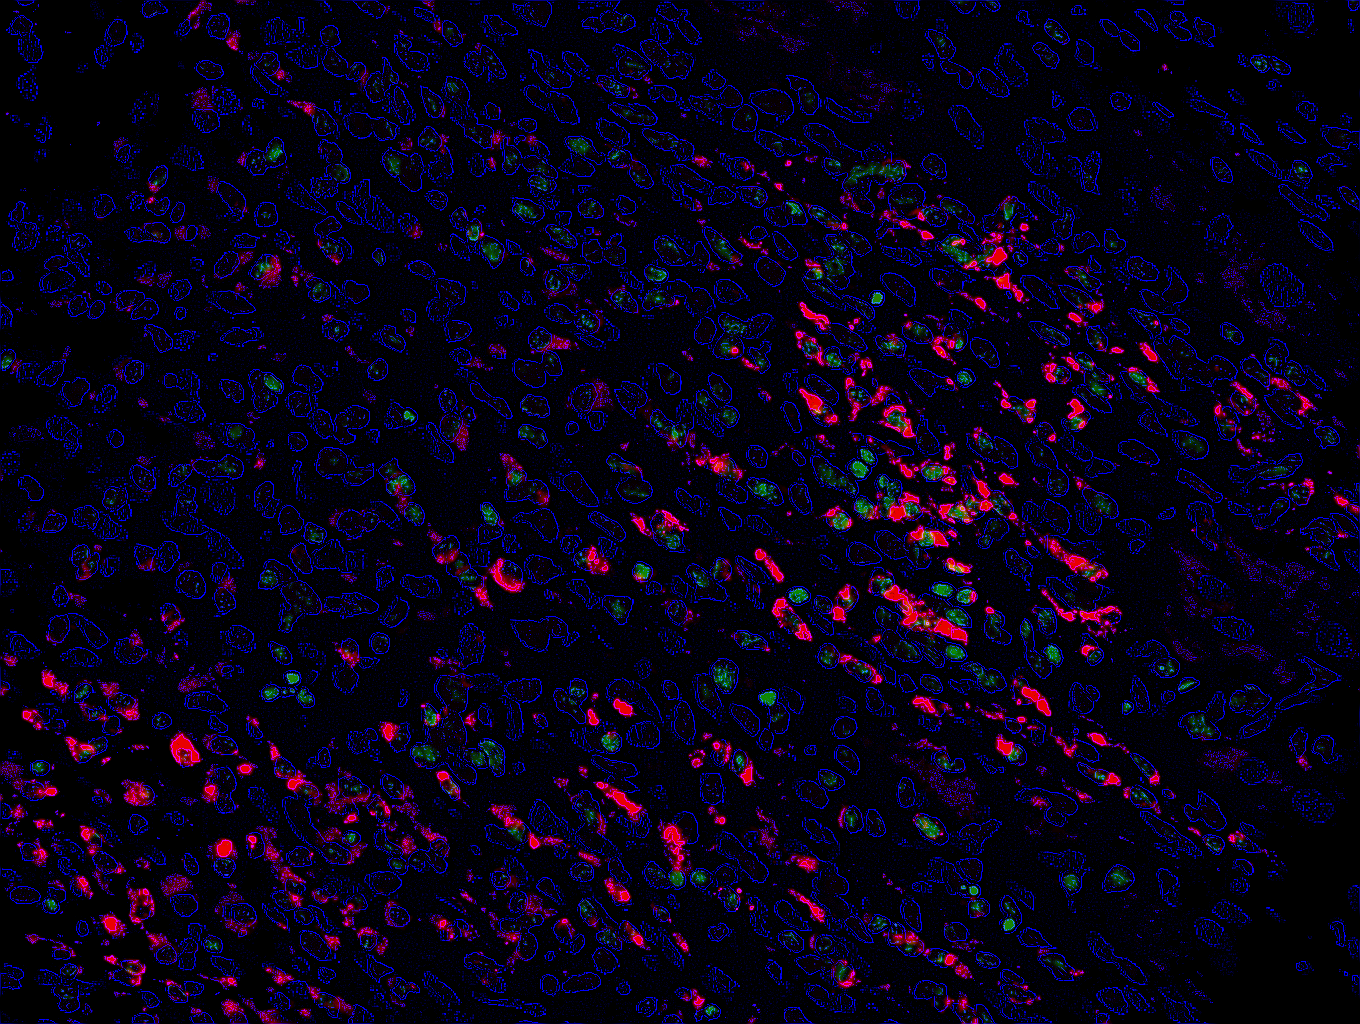

In [41]:
Danica_merged = Image.merge("RGB", (red, green, blue_edged))
Danica_merged

Čini se da je ovako nešto lakše brojati, ali problem je što FIND_EDGES filter ne dijeli stanice točno (neke "stanice" su očito prevelike).

Zaključujemo da naivne metode image processinga neće dovesti direktno do rješenja problema. Stoga krećemo u potragu za sofisticiranijim metodama. O tome više u nastavku projekta.